<a href="https://colab.research.google.com/github/MPmine/-request-/blob/main/Draw%20image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bs4

In [71]:
# Импортируем необходимые библиотеки
import random
import requests
from bs4 import BeautifulSoup
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Получаем весь код веб-страницы с данными
def get_codepage(url):
    return requests.get(url).text

In [4]:
# Создаем объект "суп" из кода
def get_soup(data):
    return BeautifulSoup(data, 'lxml')

In [5]:
# Получить список теорем
def get_theorems(soup):
    theorems = soup.find_all('mark', class_='has-inline-color has-vivid-cyan-blue-color')
    theorems = [theorem.text for theorem in theorems if not theorem.find('a')]
    return theorems


In [25]:
# Сгенерировать или иным способом получить изображение по теореме
def draw_image():
    # Здесь может быть логика для отрисовки изображения
    pass

In [7]:
# Получить случайную теорему
def get_theorem(theorems_dict):
    key = random.choice(list(theorems_dict.keys()))
    return (key, theorems_dict[key])

In [8]:
# URL веб-страницы с теоремами
url = "https://mat-teacher.ru/2022/02/25/%D0%B2%D1%81%D0%B5-%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D1%8B-%D0%B2-%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%B8/"
# Получаем код страницы по URL:
code = get_codepage(url)
# Создаем объект "суп" из кода:
soup = get_soup(code)
# Получаем список теорем:
theorems = get_theorems(soup)
# Изменяем вторую теорему, добавляя префикс "C":
theorems[1] = "C" + theorems[1]


In [9]:
# Создаем словарь, где ключ - название теоремы, а значение - текст теоремы
theorems_dict = {}

In [10]:
# Заполняем словарь теоремами в формате "название теоремы: текст теоремы"
for i in range(1, len(theorems), 2):
    if theorems[i - 1][:2].isupper() and (theorems[i][:2].islower() or theorems[i][2:4].islower()):
        theorems_dict[theorems[i - 1]] = theorems[i]


In [11]:
# Выводим список всех теорем и словарь с теоремами
print(theorems)
print(theorems_dict)


['ТЕОРЕМА О СУММЕ\xa0 УГЛОВ ТРЕУГОЛЬНИКА', 'CС', 'умма углов в треугольнике равна 180 градусов', 'ТEОРЕМА О СРЕДНЕЙ ЛИНИИ ТРЕУГОЛЬНИКА', 'Средняя линия треугольника, соединяющая середины двух сторон, параллельна третьей стороне и равна ее половине.', 'ТЕОРЕМА О СРЕДНЕЙ ЛИНИИ ТРАПЕЦИИ', 'Средняя линия трапеции параллельна основаниям и ра', 'вна их полусумме.', 'ТЕОРЕМА ПИФАГОРА', 'В прямоугольном треугольнике квадрат гипотенузы равен сумме квадратов катетов.', 'ТEОРЕМА ФАЛЕСА', 'Если две параллельные прямые, пересекающие стороны угла, отсекают на одной стороне угла равные отрезки, то они отсекают равные отрезки и на другой.', 'ТЕОРЕМА О ПРОПОРЦИОНАЛЬНЫХ ОТРЕЗКАХ', 'ТЕОРЕМА О МЕДИАНЕ И БИССЕКТРИСЕ ТРЕУГОЛЬНИКА', 'Три медианы треугольника пересекаются в одной точке и точкой пересечения делятся в отношении 2:1, считая от вершины треугольника.', 'Биссектриса треугольника делит сторону на отрезки, пропорциональные прилежащим к ним сторонам.', 'ТЕОРЕМА МЕНЕЛАЯ', 'коллинеарными', ' условие кол

In [20]:
# Получить список теорем с объединенными идущими подряд строками с большими и маленькими буквами
def get_theorems(soup):
    raw_theorems = soup.find_all('mark', class_='has-inline-color has-vivid-cyan-blue-color')
    theorems = []

    current_theorem_upper = ""
    current_theorem_lower = ""

    for theorem in raw_theorems:
        text = theorem.text
        if text and text[0].isupper():
            current_theorem_lower = current_theorem_lower.strip()
            if current_theorem_upper:
                theorems.append(current_theorem_upper)
                current_theorem_upper = ""
            current_theorem_lower = current_theorem_lower + text + " "
        else:
            current_theorem_upper = current_theorem_upper + text + " "

    current_theorem_lower = current_theorem_lower.strip()
    if current_theorem_upper:
        theorems.append(current_theorem_upper)
    if current_theorem_lower:
        theorems.append(current_theorem_lower)

    return theorems

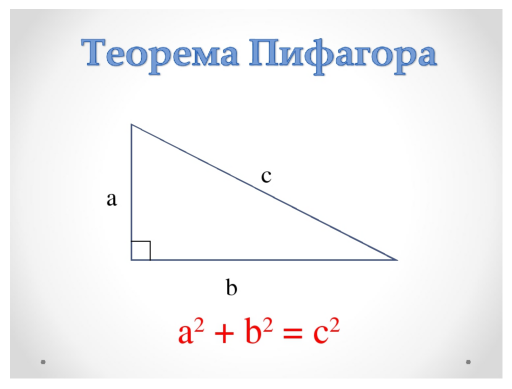

In [87]:
def draw_theorem_image():
    # Загружаем изображение теоремы
    theorem_image = mpimg.imread('theorem_image.jpg')

    # Создаем фигуру и оси
    fig, ax = plt.subplots()

    # Отображаем изображение теоремы
    ax.imshow(theorem_image)

    # Устанавливаем оси
    ax.axis('off')

    # Отображаем изображение
    plt.show()
# Вызываем функцию для отображения изображения теоремы
draw_theorem_image()

In [69]:
# Получаем случайную теорему из словаря
rand_theorem = get_theorem(theorems_dict)
print(rand_theorem)

('ТEОРЕМА ФАЛЕСА', 'Если две параллельные прямые, пересекающие стороны угла, отсекают на одной стороне угла равные отрезки, то они отсекают равные отрезки и на другой.')
